<a href="https://colab.research.google.com/github/bharathts1507/TSAI-Assignments-EVA4/blob/master/S8_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from tqdm import tqdm
import torch
import torch.nn as nn 
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

In [3]:
# mount the drive to access libraries and supportive classes
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
import sys
sys.path.append('/content/drive/My Drive/TSAI_EVA4/S8')

In [0]:
from data import get_data_loader
from model import Net
from train import train, eval
from resnet import ResNet18

In [0]:
Net = ResNet18

In [7]:
trainloader, testloader, classes = get_data_loader()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


plane   cat   dog plane horse   cat plane plane  deer  bird plane truck  deer truck horse   cat plane  frog plane plane   cat   cat  frog truck   dog   car plane   cat  frog plane   cat  ship   cat  deer   dog   cat  deer   cat  ship  deer   car plane   car horse  deer   cat  ship truck  frog plane   dog   dog   cat plane   car truck  ship   car  ship   dog  bird  bird plane  deer


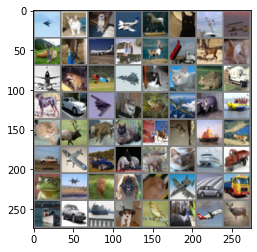

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("device:", device)
net = Net().to(device)
summary(net, input_size=(3, 32, 32))

device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

In [12]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,train_losses, train_acc)
    eval(model, device, testloader, test_losses, test_acc)


  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.0650203227996826 Batch_id=781 Accuracy=52.03: 100%|██████████| 782/782 [01:00<00:00, 12.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0513, Accuracy: 6304/10000 (63.04%)

EPOCH: 1


Loss=1.0746443271636963 Batch_id=781 Accuracy=72.45: 100%|██████████| 782/782 [01:01<00:00, 12.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7326, Accuracy: 7434/10000 (74.34%)

EPOCH: 2


Loss=0.6696724891662598 Batch_id=781 Accuracy=80.69: 100%|██████████| 782/782 [01:01<00:00, 12.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7101, Accuracy: 7648/10000 (76.48%)

EPOCH: 3


Loss=0.4974292814731598 Batch_id=781 Accuracy=85.93: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6115, Accuracy: 7998/10000 (79.98%)

EPOCH: 4


Loss=0.13290953636169434 Batch_id=781 Accuracy=89.81: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6352, Accuracy: 8036/10000 (80.36%)

EPOCH: 5


Loss=0.016435354948043823 Batch_id=781 Accuracy=92.81: 100%|██████████| 782/782 [01:00<00:00, 12.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6806, Accuracy: 8051/10000 (80.51%)

EPOCH: 6


Loss=0.4236975312232971 Batch_id=781 Accuracy=95.00: 100%|██████████| 782/782 [01:01<00:00, 12.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7488, Accuracy: 8040/10000 (80.40%)

EPOCH: 7


Loss=0.10684534907341003 Batch_id=781 Accuracy=96.01: 100%|██████████| 782/782 [01:01<00:00, 12.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6654, Accuracy: 8241/10000 (82.41%)

EPOCH: 8


Loss=0.12748941779136658 Batch_id=781 Accuracy=97.55: 100%|██████████| 782/782 [01:01<00:00, 12.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7453, Accuracy: 8236/10000 (82.36%)

EPOCH: 9


Loss=0.02226501703262329 Batch_id=781 Accuracy=98.02: 100%|██████████| 782/782 [01:01<00:00, 12.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7969, Accuracy: 8235/10000 (82.35%)

EPOCH: 10


Loss=0.008824825286865234 Batch_id=781 Accuracy=98.12: 100%|██████████| 782/782 [01:01<00:00, 12.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7836, Accuracy: 8281/10000 (82.81%)

EPOCH: 11


Loss=0.2030162513256073 Batch_id=781 Accuracy=98.94: 100%|██████████| 782/782 [01:01<00:00, 12.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8641, Accuracy: 8231/10000 (82.31%)

EPOCH: 12


Loss=0.04900979995727539 Batch_id=781 Accuracy=99.00: 100%|██████████| 782/782 [01:00<00:00, 12.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7830, Accuracy: 8437/10000 (84.37%)

EPOCH: 13


Loss=0.04850926995277405 Batch_id=781 Accuracy=99.28: 100%|██████████| 782/782 [01:00<00:00, 12.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7896, Accuracy: 8419/10000 (84.19%)

EPOCH: 14


Loss=0.1804966926574707 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [01:01<00:00, 12.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7974, Accuracy: 8446/10000 (84.46%)

EPOCH: 15


Loss=0.10370945930480957 Batch_id=781 Accuracy=99.62: 100%|██████████| 782/782 [01:00<00:00, 12.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8008, Accuracy: 8423/10000 (84.23%)

EPOCH: 16


Loss=0.15255814790725708 Batch_id=781 Accuracy=99.60: 100%|██████████| 782/782 [01:00<00:00, 12.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8547, Accuracy: 8430/10000 (84.30%)

EPOCH: 17


Loss=0.0007511377334594727 Batch_id=781 Accuracy=99.32: 100%|██████████| 782/782 [01:00<00:00, 12.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8115, Accuracy: 8387/10000 (83.87%)

EPOCH: 18


Loss=0.06347015500068665 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [01:02<00:00, 12.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8997, Accuracy: 8351/10000 (83.51%)

EPOCH: 19


Loss=0.018376827239990234 Batch_id=781 Accuracy=99.59: 100%|██████████| 782/782 [01:01<00:00, 12.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8581, Accuracy: 8424/10000 (84.24%)

EPOCH: 20


Loss=0.002176940441131592 Batch_id=781 Accuracy=99.81: 100%|██████████| 782/782 [01:01<00:00, 12.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8441, Accuracy: 8437/10000 (84.37%)

EPOCH: 21


Loss=0.053356051445007324 Batch_id=781 Accuracy=99.84: 100%|██████████| 782/782 [01:01<00:00, 12.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8895, Accuracy: 8385/10000 (83.85%)

EPOCH: 22


Loss=0.08563631772994995 Batch_id=781 Accuracy=99.81: 100%|██████████| 782/782 [01:01<00:00, 12.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8530, Accuracy: 8457/10000 (84.57%)

EPOCH: 23


Loss=0.0031832456588745117 Batch_id=781 Accuracy=99.89: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8284, Accuracy: 8509/10000 (85.09%)

EPOCH: 24


Loss=0.0004773736000061035 Batch_id=781 Accuracy=99.94: 100%|██████████| 782/782 [01:02<00:00, 12.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8141, Accuracy: 8526/10000 (85.26%)

EPOCH: 25


Loss=2.0265579223632812e-06 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:02<00:00, 12.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8092, Accuracy: 8554/10000 (85.54%)

EPOCH: 26


Loss=7.140636444091797e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8109, Accuracy: 8576/10000 (85.76%)

EPOCH: 27


Loss=1.9311904907226562e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7924, Accuracy: 8599/10000 (85.99%)

EPOCH: 28


Loss=5.125999450683594e-06 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7961, Accuracy: 8581/10000 (85.81%)

EPOCH: 29


Loss=0.00013709068298339844 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8129, Accuracy: 8577/10000 (85.77%)

EPOCH: 30


Loss=0.000976264476776123 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:00<00:00, 12.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7903, Accuracy: 8589/10000 (85.89%)

EPOCH: 31


Loss=0.00012677907943725586 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7993, Accuracy: 8584/10000 (85.84%)

EPOCH: 32


Loss=1.0728836059570312e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8042, Accuracy: 8600/10000 (86.00%)

EPOCH: 33


Loss=0.00024181604385375977 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:00<00:00, 12.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8004, Accuracy: 8591/10000 (85.91%)

EPOCH: 34


Loss=1.2218952178955078e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7928, Accuracy: 8603/10000 (86.03%)

EPOCH: 35


Loss=0.006116926670074463 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:02<00:00, 12.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8039, Accuracy: 8616/10000 (86.16%)

EPOCH: 36


Loss=0.03281557559967041 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8147, Accuracy: 8600/10000 (86.00%)

EPOCH: 37


Loss=0.0009835362434387207 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:01<00:00, 12.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8182, Accuracy: 8593/10000 (85.93%)

EPOCH: 38


Loss=2.6464462280273438e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:01<00:00, 12.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8129, Accuracy: 8616/10000 (86.16%)

EPOCH: 39


Loss=2.574920654296875e-05 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:02<00:00, 12.61it/s]



Test set: Average loss: 0.8047, Accuracy: 8625/10000 (86.25%)



Text(0.5, 1.0, 'Test Accuracy')

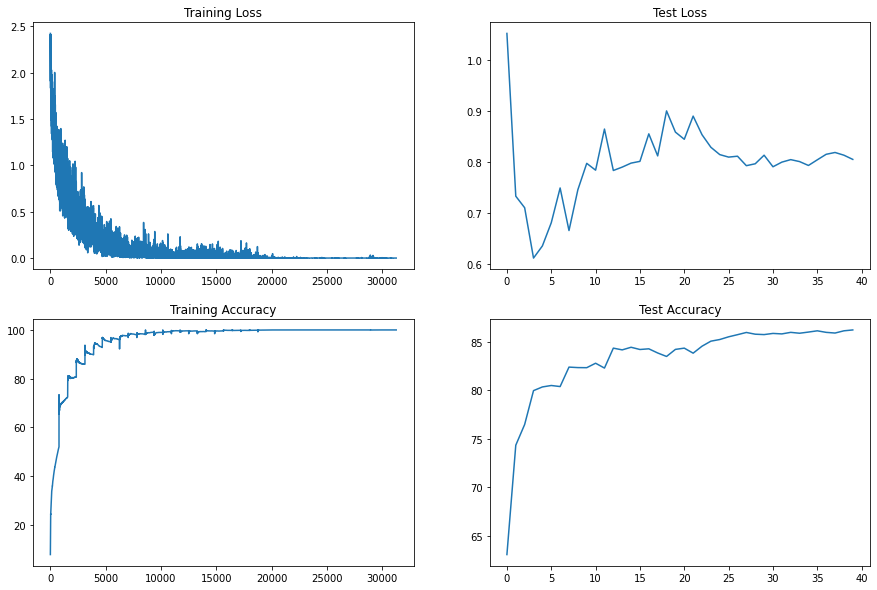

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")